# Option Pricing Based on Several Monte Carlo Technics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
r=0.03 #无风险利率
sigma=0.2 #正态分布标准差
T=0.25 

## Call Option

**Performance of control variates and antithetic variates**

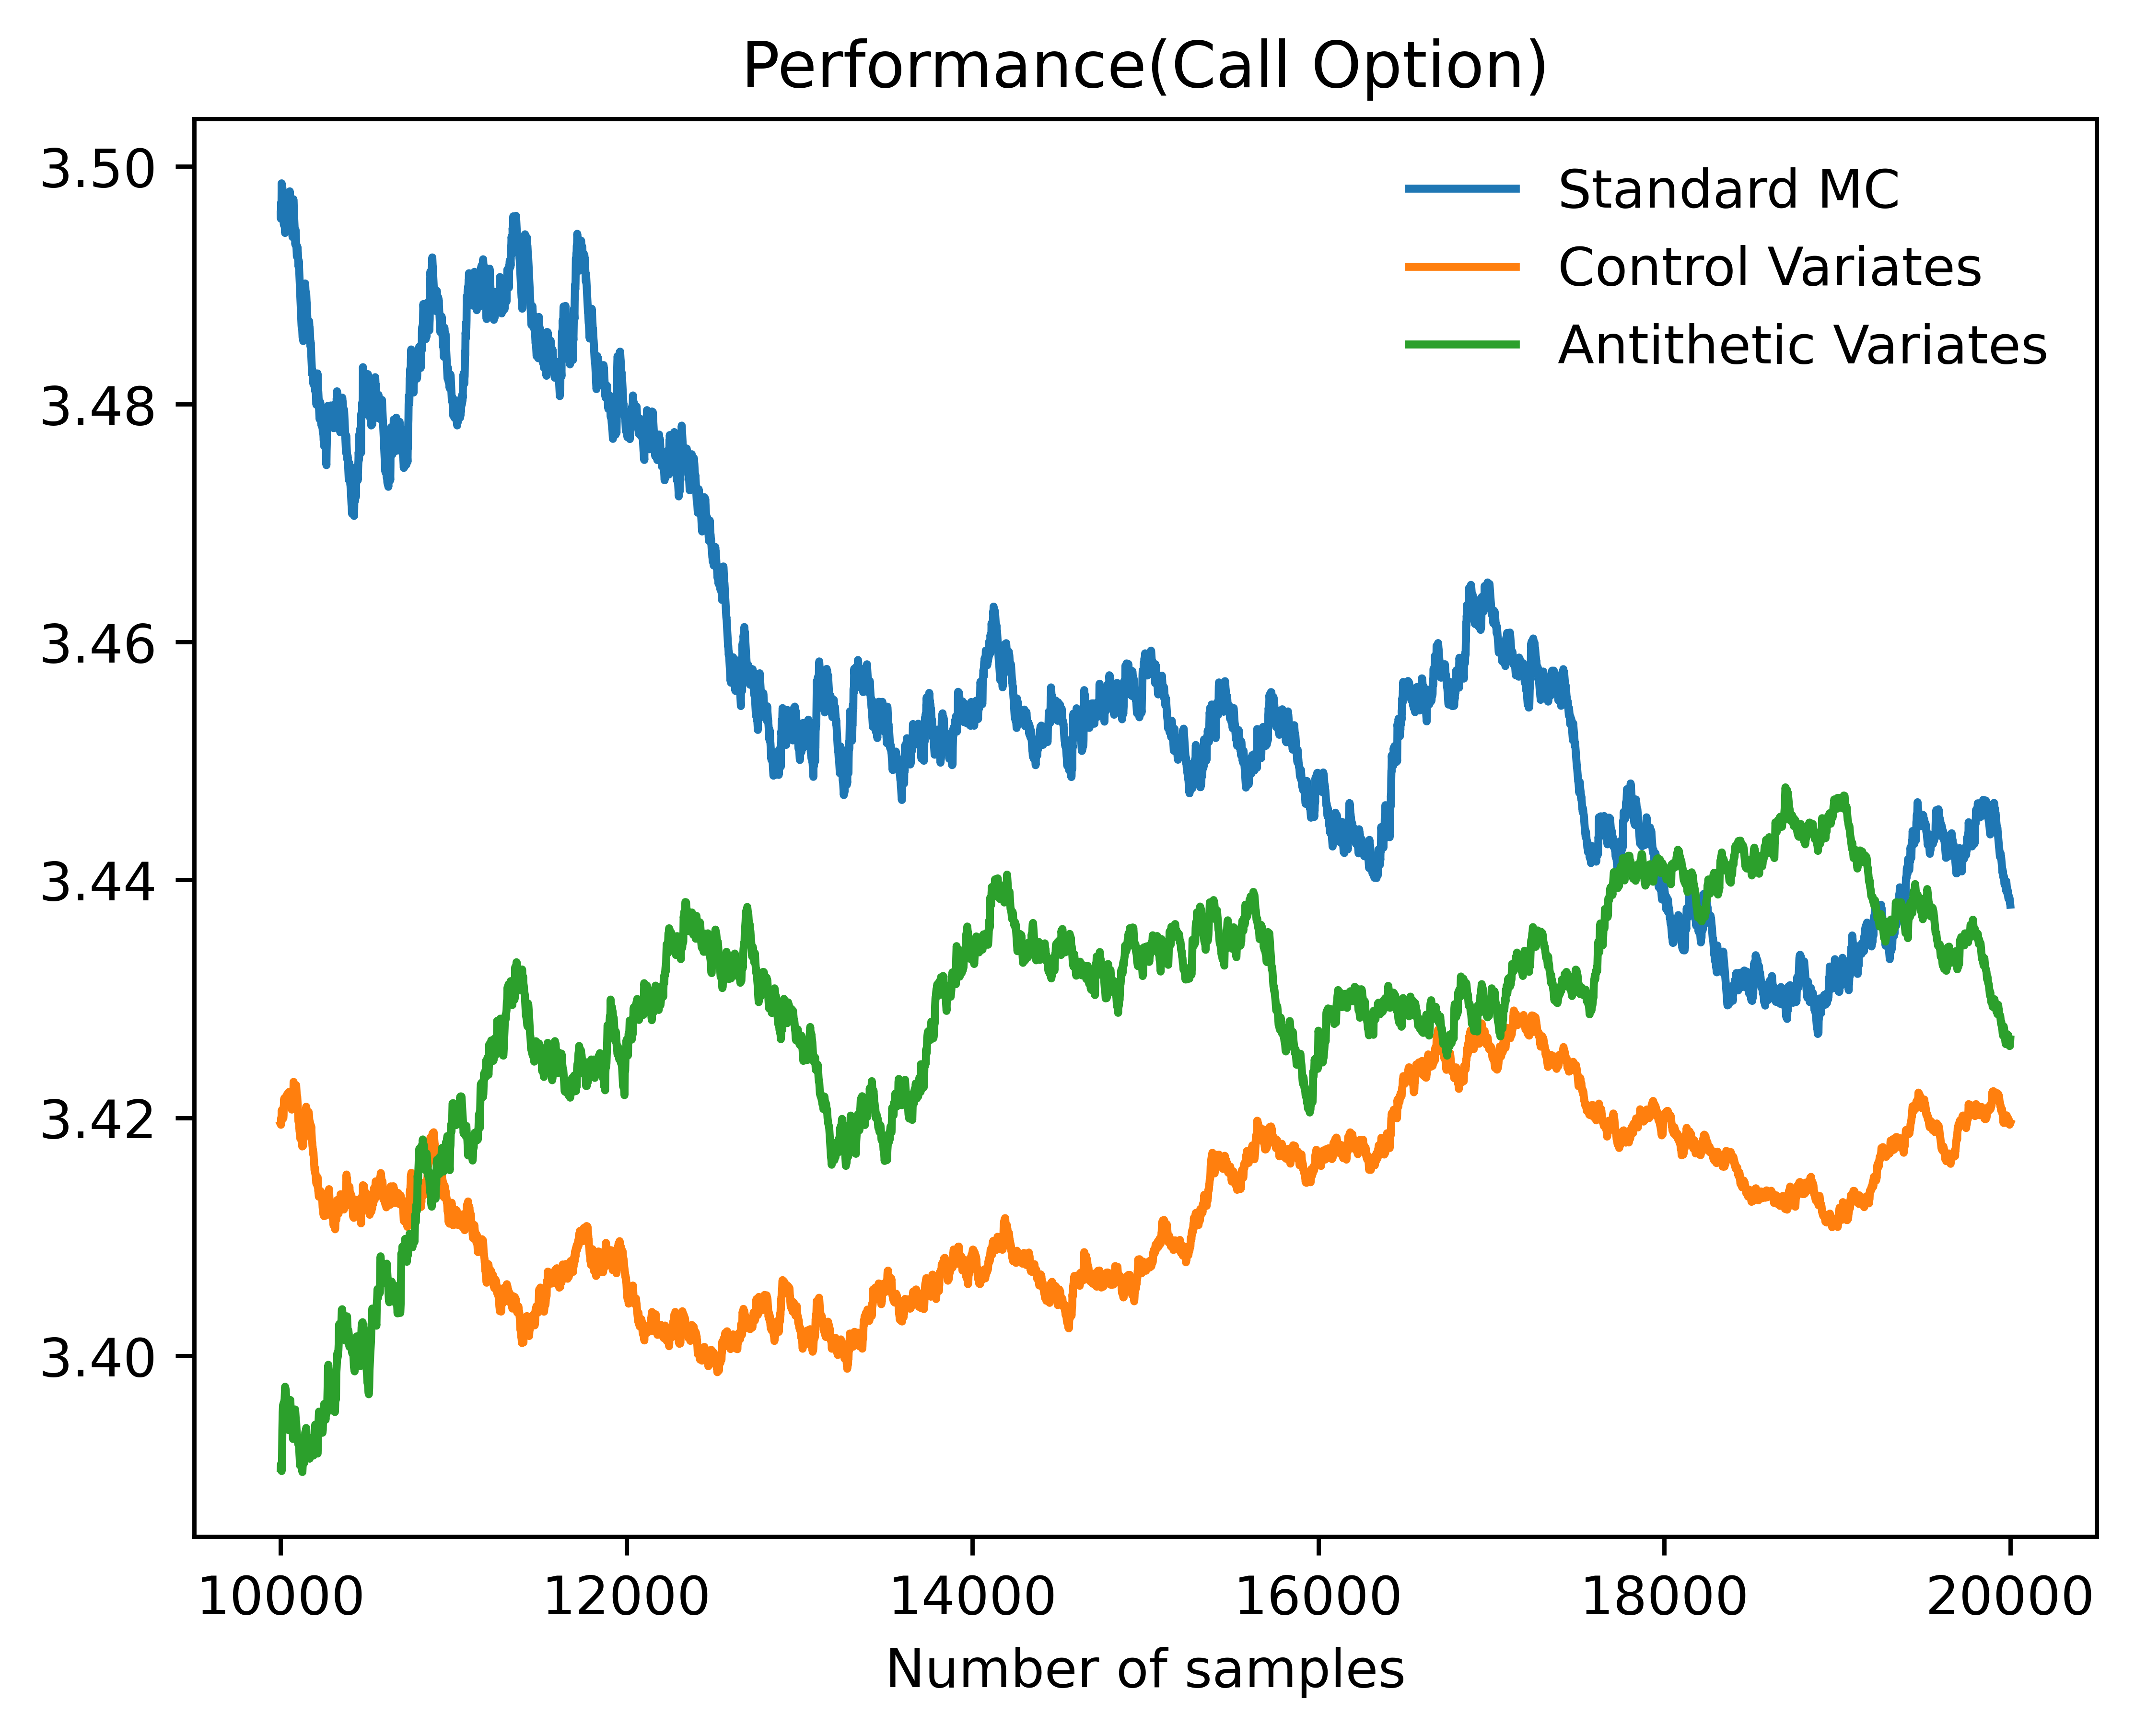

In [3]:
sample_size=20000
S0=100   #assume
K=102    #assume
antithetic=[]
z_control=np.random.default_rng(seed=123456).standard_normal(size=sample_size) #正态分布随机数 size=20000
S_T=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*z_control+r*T)
Y_control=S_T
X=np.exp(-r*T)*np.maximum(Y_control-K,0)
b_star= np.cov(X, Y_control)[0, 1] / Y_control.var()
control_variates_est = X - b_star * (Y_control - S0*np.exp(r*T))

z_antithetic=np.random.default_rng(seed=123456).standard_normal(size=sample_size//2)
S_T1=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*z_antithetic+r*T)
S_T2=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*(-z_antithetic)+r*T)
X1=np.exp(-r*T)*np.maximum(S_T1-K,0)
X2=np.exp(-r*T)*np.maximum(S_T2-K,0)
Y=(X1+X2)/2
for i in Y:
    antithetic.append(i)
    antithetic.append(i)
burn_in_samples = sample_size // 2
fig, ax = plt.subplots()
xx = np.arange(burn_in_samples+1, sample_size+1)
running_average = np.cumsum(X)[burn_in_samples:] / xx
running_average_covariates = np.cumsum(control_variates_est)[burn_in_samples:] / xx
running_average_antithetic = np.cumsum(antithetic)[burn_in_samples:] / xx
plt.rcParams['figure.dpi'] = 800
ax.plot(xx, running_average, label='Standard MC')
ax.plot(xx, running_average_covariates, label='Control Variates')
ax.plot(xx,running_average_antithetic,label='Antithetic Variates')
ax.set_xlabel('Number of samples')
ax.set_title('Performance(Call Option)')
ax.legend(frameon=False);

**Monte Carlo simulation effect on different K**

C:\Users\Mo\AppData\Local\Temp\ipykernel_19564\80434048.py:18: RuntimeWarning: invalid value encountered in scalar divide
  performance_control_variates.append(1 - control_variates_est.var() / X.var())
C:\Users\Mo\AppData\Local\Temp\ipykernel_19564\80434048.py:27: RuntimeWarning: invalid value encountered in scalar divide
  performance_antithetic_variates.append(1-Y.var()/X.var())


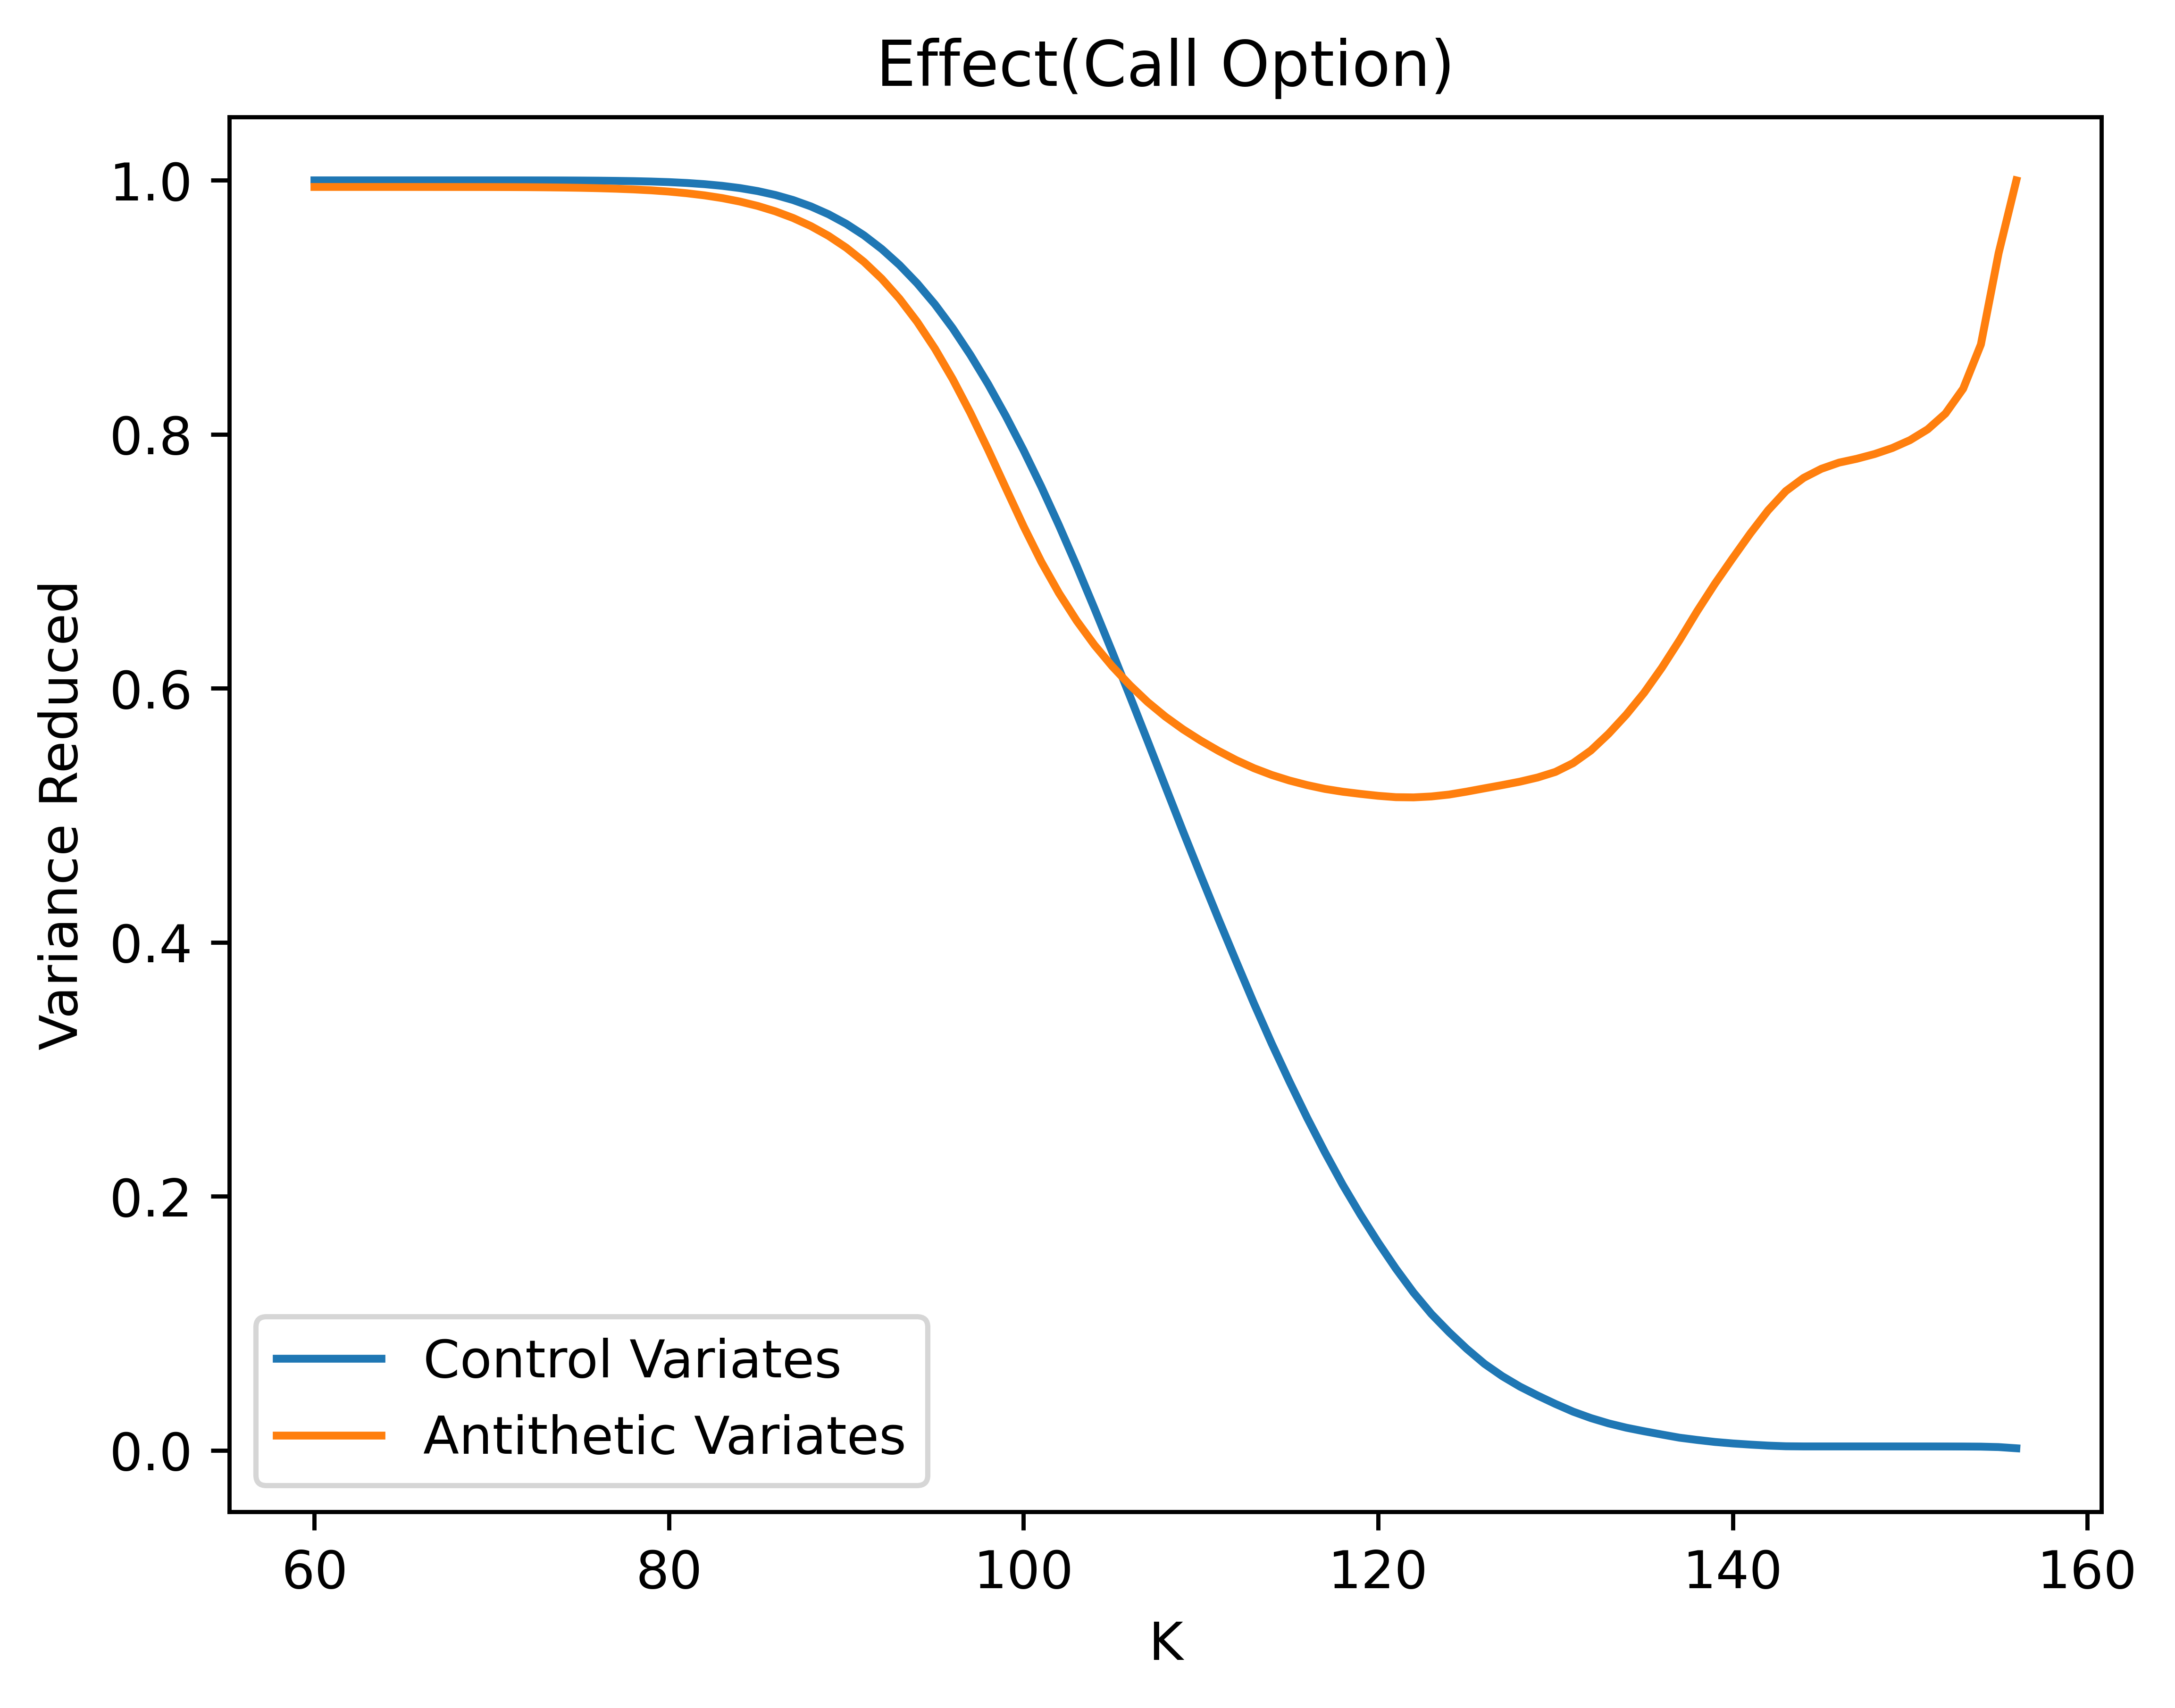

In [4]:
sample_size=10000
y=[]
yvar=[]
Kvalue=[]
performance_antithetic_variates=[]
performance_control_variates=[]
variance_control_variates_est=[]
variance_X=[]

for K in range (60,160):
    z=np.random.default_rng(seed=123456).standard_normal(size=sample_size)
    z1=np.random.default_rng(seed=123456).standard_normal(size=2*sample_size)
    S_T=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*z1+r*T)
    Y1=S_T
    X=np.exp(-r*T)*np.maximum(Y1-K,0)
    b_star= np.cov(X, Y1)[0, 1] / Y1.var()
    control_variates_est = X - b_star * (Y1 - S0*np.exp(r*T))
    performance_control_variates.append(1 - control_variates_est.var() / X.var())
    variance_control_variates_est.append(control_variates_est.var())
    S_T1=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*z+r*T)
    S_T2=S0*np.exp(-0.5*sigma**2*T+sigma*np.sqrt(T)*(-z)+r*T)
    X1=np.exp(-r*T)*np.maximum(S_T1-K,0)
    X2=np.exp(-r*T)*np.maximum(S_T2-K,0)
    Y=(X1+X2)/2
    y.append(Y.mean())
    yvar.append(Y.var())
    performance_antithetic_variates.append(1-Y.var()/X.var())
    variance_X.append(X.var())
    Kvalue.append(K)
plt.plot(Kvalue,performance_control_variates,label='Control Variates')
plt.plot(Kvalue,performance_antithetic_variates,label='Antithetic Variates')
plt.xlabel('K')
plt.ylabel('Variance Reduced')
plt.title('Effect(Call Option)')
plt.legend()
plt.show()

In [62]:
K=59
for i in range(100):
    K+=1
    if performance_control_variates[i]<performance_antithetic_variates[i]:
        break
print(K)

106


## Put Option

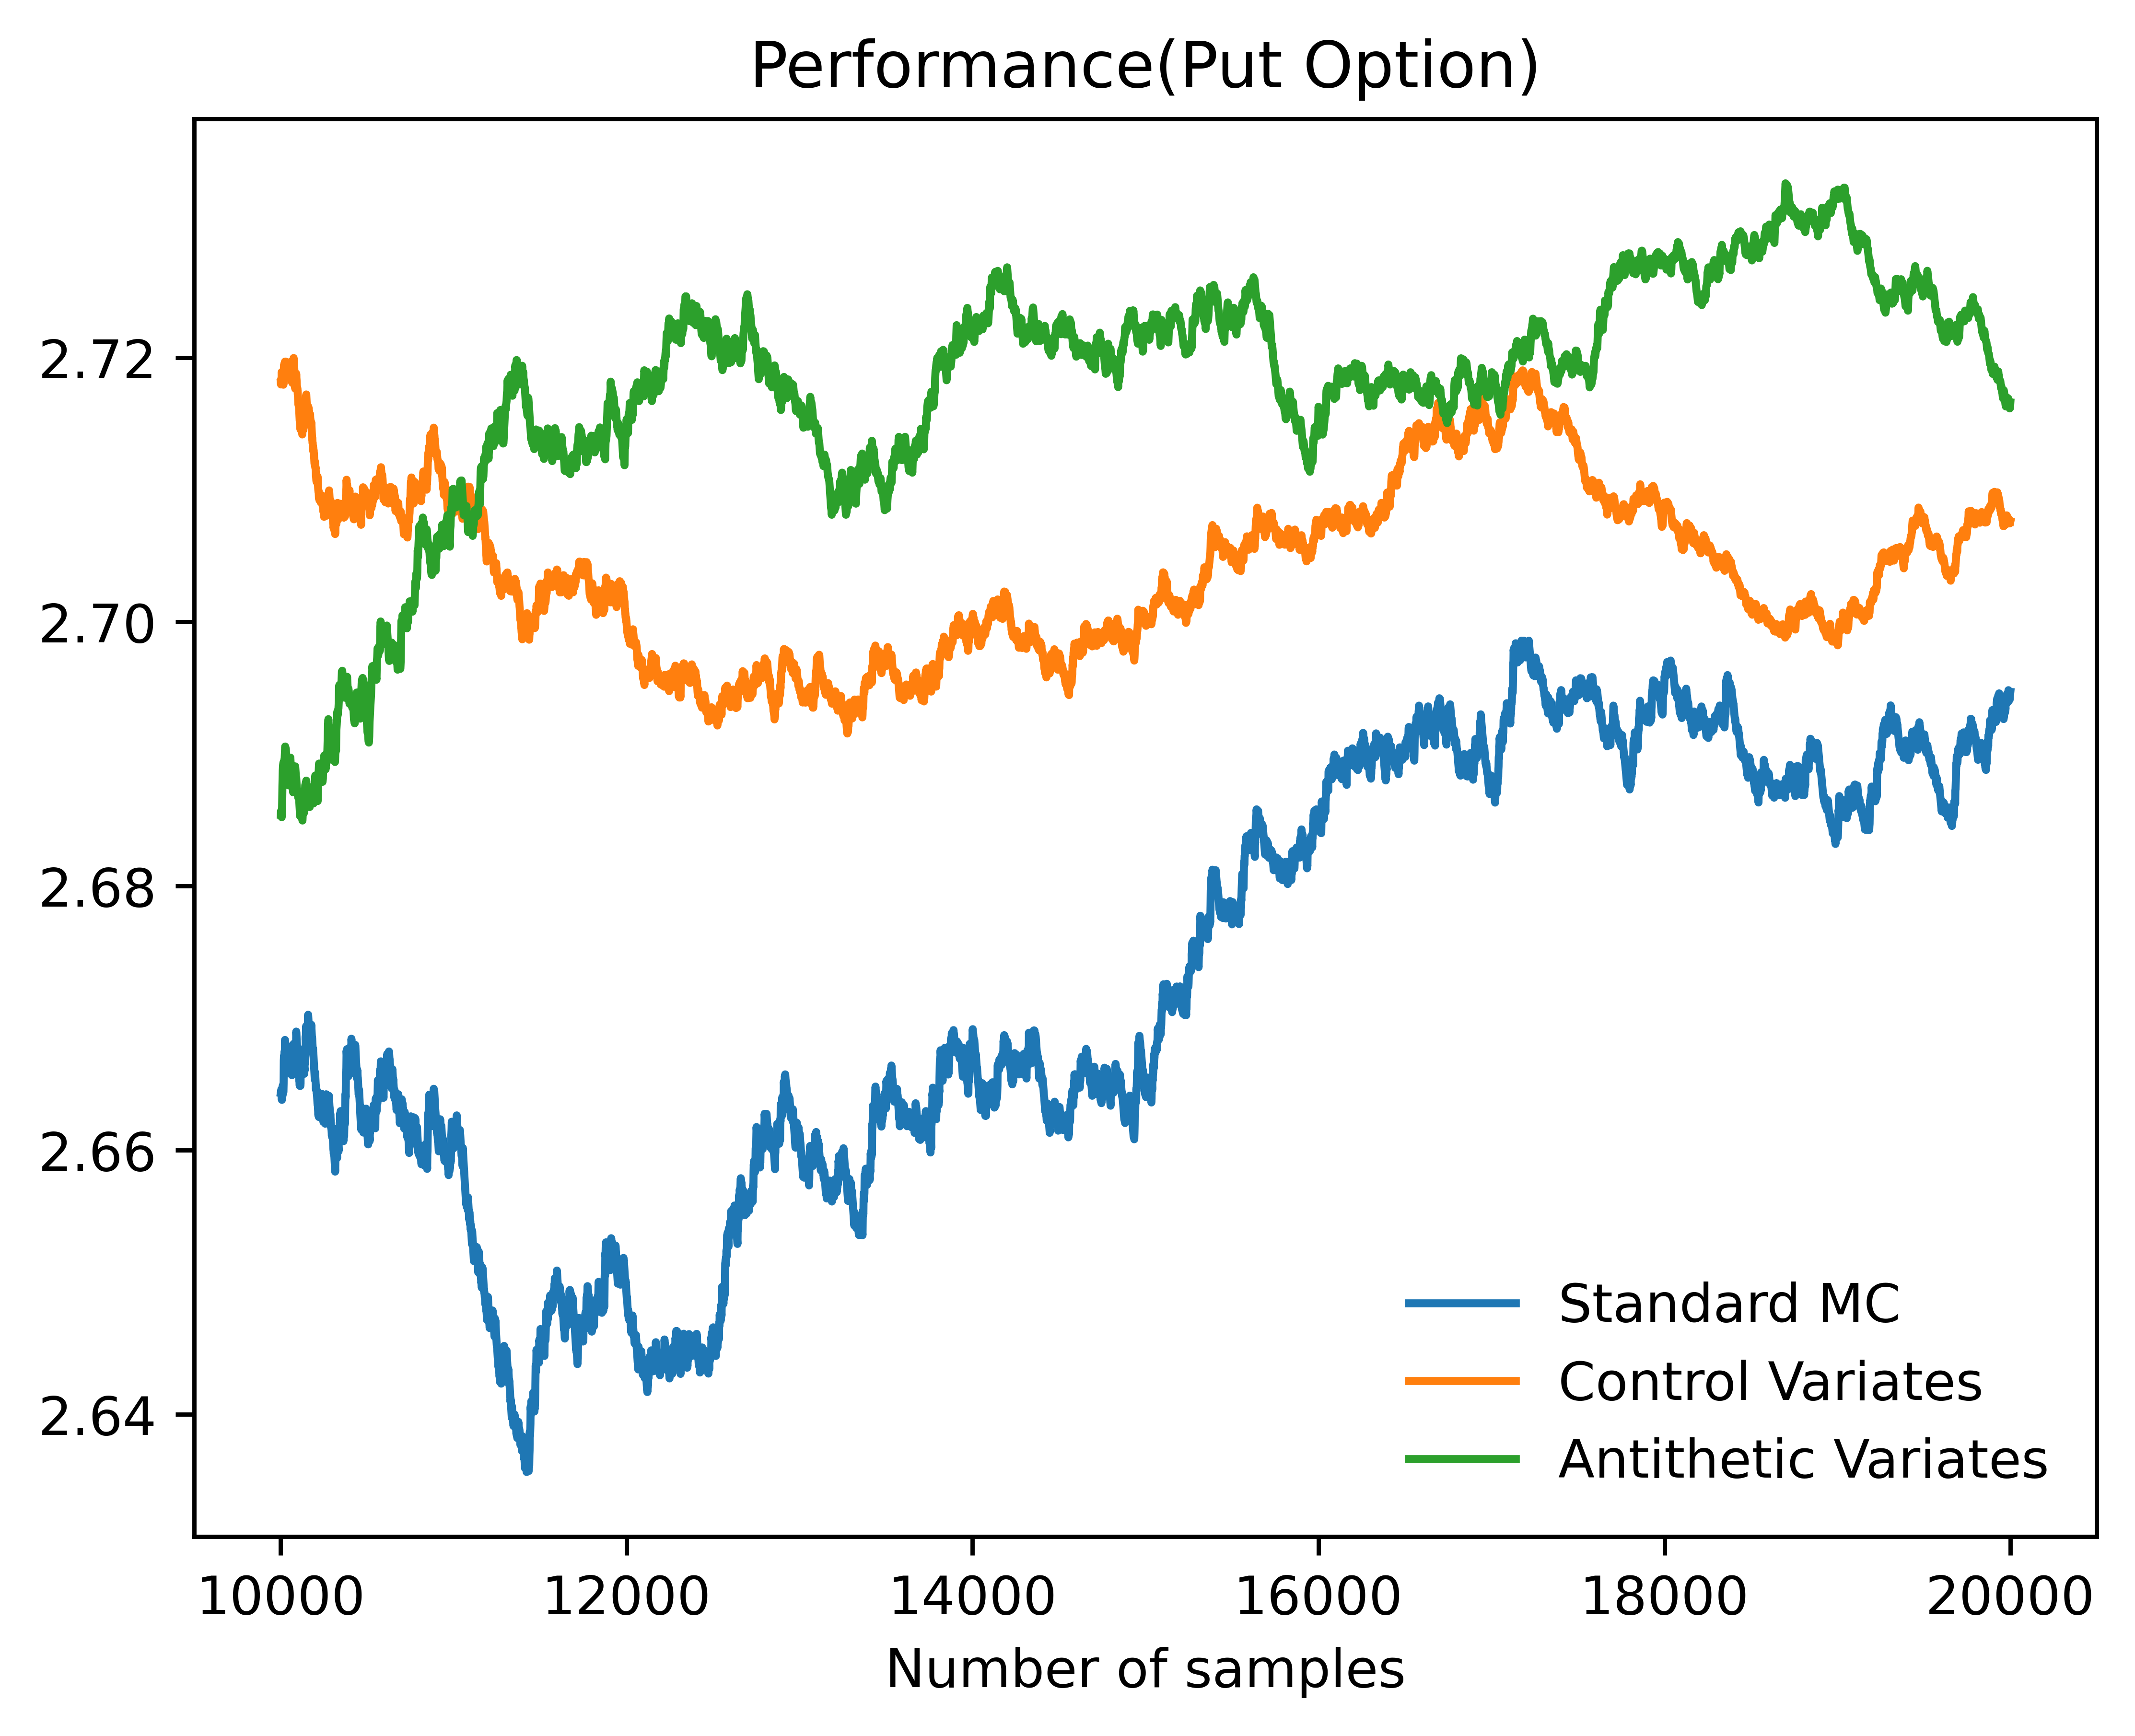

In [5]:
sample_size=20000
S0=100   #assume
K=98    #assume

z_control=np.random.default_rng(seed=123456).standard_normal(size=sample_size) #正态分布随机数 size=20000
S_T=S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*z_control)
Y_control=S_T
X=np.exp(-r*T)*np.maximum(K-Y_control,0)
b_star= np.cov(X, Y_control)[0, 1] / Y_control.var()
control_variates_est = X - b_star * (Y_control -  S0*np.exp(r*T))

antithetic=[]
z_antithetic=np.random.default_rng(seed=123456).standard_normal(size=sample_size//2)
S_T1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z_antithetic)
S_T2=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*(-z_antithetic))
X1=np.exp(-r*T)*np.maximum(K-S_T1,0)
X2=np.exp(-r*T)*np.maximum(K-S_T2,0)
Y=(X1+X2)/2
for i in Y:
    antithetic.append(i)
    antithetic.append(i)
    
    
burn_in_samples = sample_size // 2
fig, ax = plt.subplots()
xx = np.arange(burn_in_samples+1, sample_size+1)
running_average = np.cumsum(X)[burn_in_samples:] / xx
running_average_covariates = np.cumsum(control_variates_est)[burn_in_samples:] / xx
running_average_antithetic = np.cumsum(antithetic)[burn_in_samples:] / xx

plt.rcParams['figure.dpi'] = 800
ax.plot(xx, running_average, label='Standard MC')
ax.plot(xx, running_average_covariates, label='Control Variates')
ax.plot(xx,running_average_antithetic,label='Antithetic Variates')
ax.set_xlabel('Number of samples')
ax.set_title('Performance(Put Option)')
ax.legend(frameon=False);

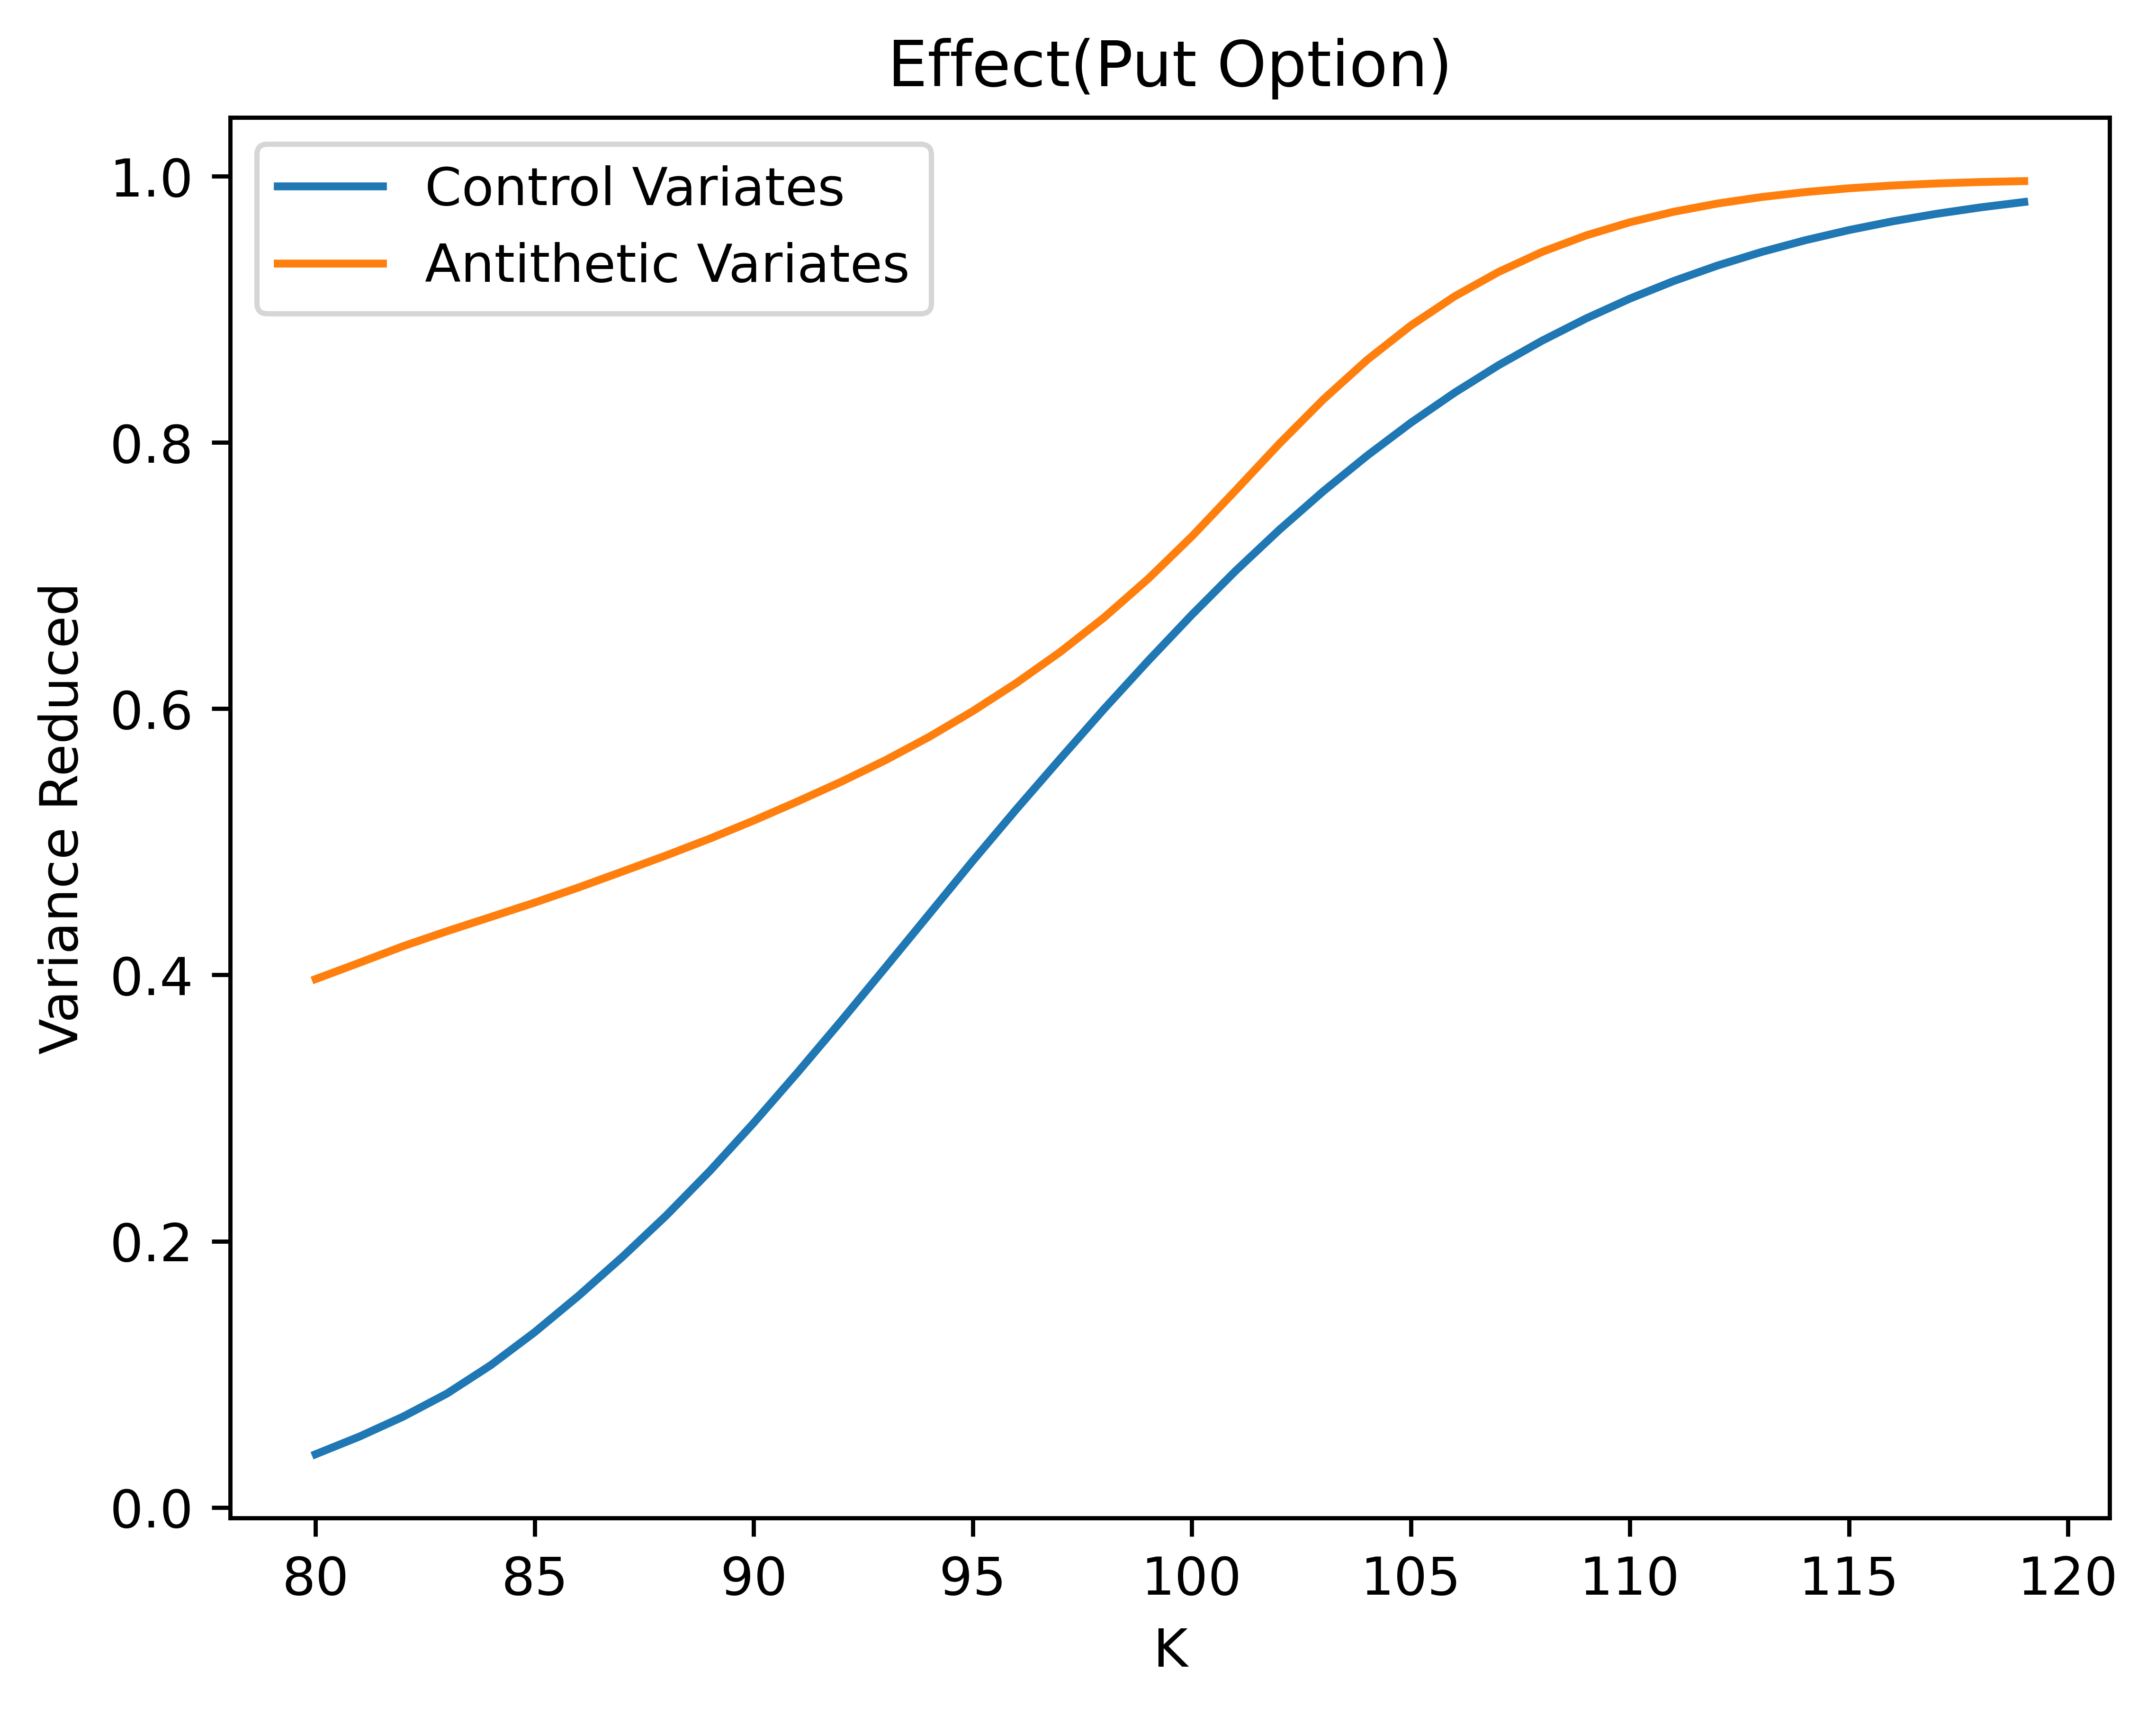

In [6]:
sample_size=10000
y=[]
yvar=[]
Kvalue=[]
performance_antithetic_variates=[]
performance_control_variates=[]
variance_control_variates_est=[]
variance_X=[]

for K in range (80,120):
    z=np.random.default_rng(seed=123456).standard_normal(size=sample_size)
    z1=np.random.default_rng(seed=123456).standard_normal(size=2*sample_size)
    S_T=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z1)
    Y1=S_T
    X=np.exp(-r*T)*np.maximum(K-Y1,0)
    b_star= np.cov(X, Y1)[0, 1] / Y1.var()
    control_variates_est = X - b_star * (Y1-S0*np.exp(r*T))
    
    performance_control_variates.append(1 - control_variates_est.var() / X.var())
    variance_control_variates_est.append(control_variates_est.var())
    
    S_T1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z)
    S_T2=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*(-z))
    X1=np.exp(-r*T)*np.maximum(K-S_T1,0)
    X2=np.exp(-r*T)*np.maximum(K-S_T2,0)
    Y=(X1+X2)/2
    y.append(Y.mean())
    yvar.append(Y.var())
    performance_antithetic_variates.append(1-Y.var()/X.var())
    variance_X.append(X.var())
    Kvalue.append(K)
plt.plot(Kvalue,performance_control_variates,label='Control Variates')
plt.plot(Kvalue,performance_antithetic_variates,label='Antithetic Variates')
plt.xlabel('K')
plt.ylabel('Variance Reduced')
plt.title('Effect(Put Option)')
plt.legend()
plt.show()

## Power Option

performance of control variates: 0.9948361631484889
performance of antithetic variates: 0.9795980563840916


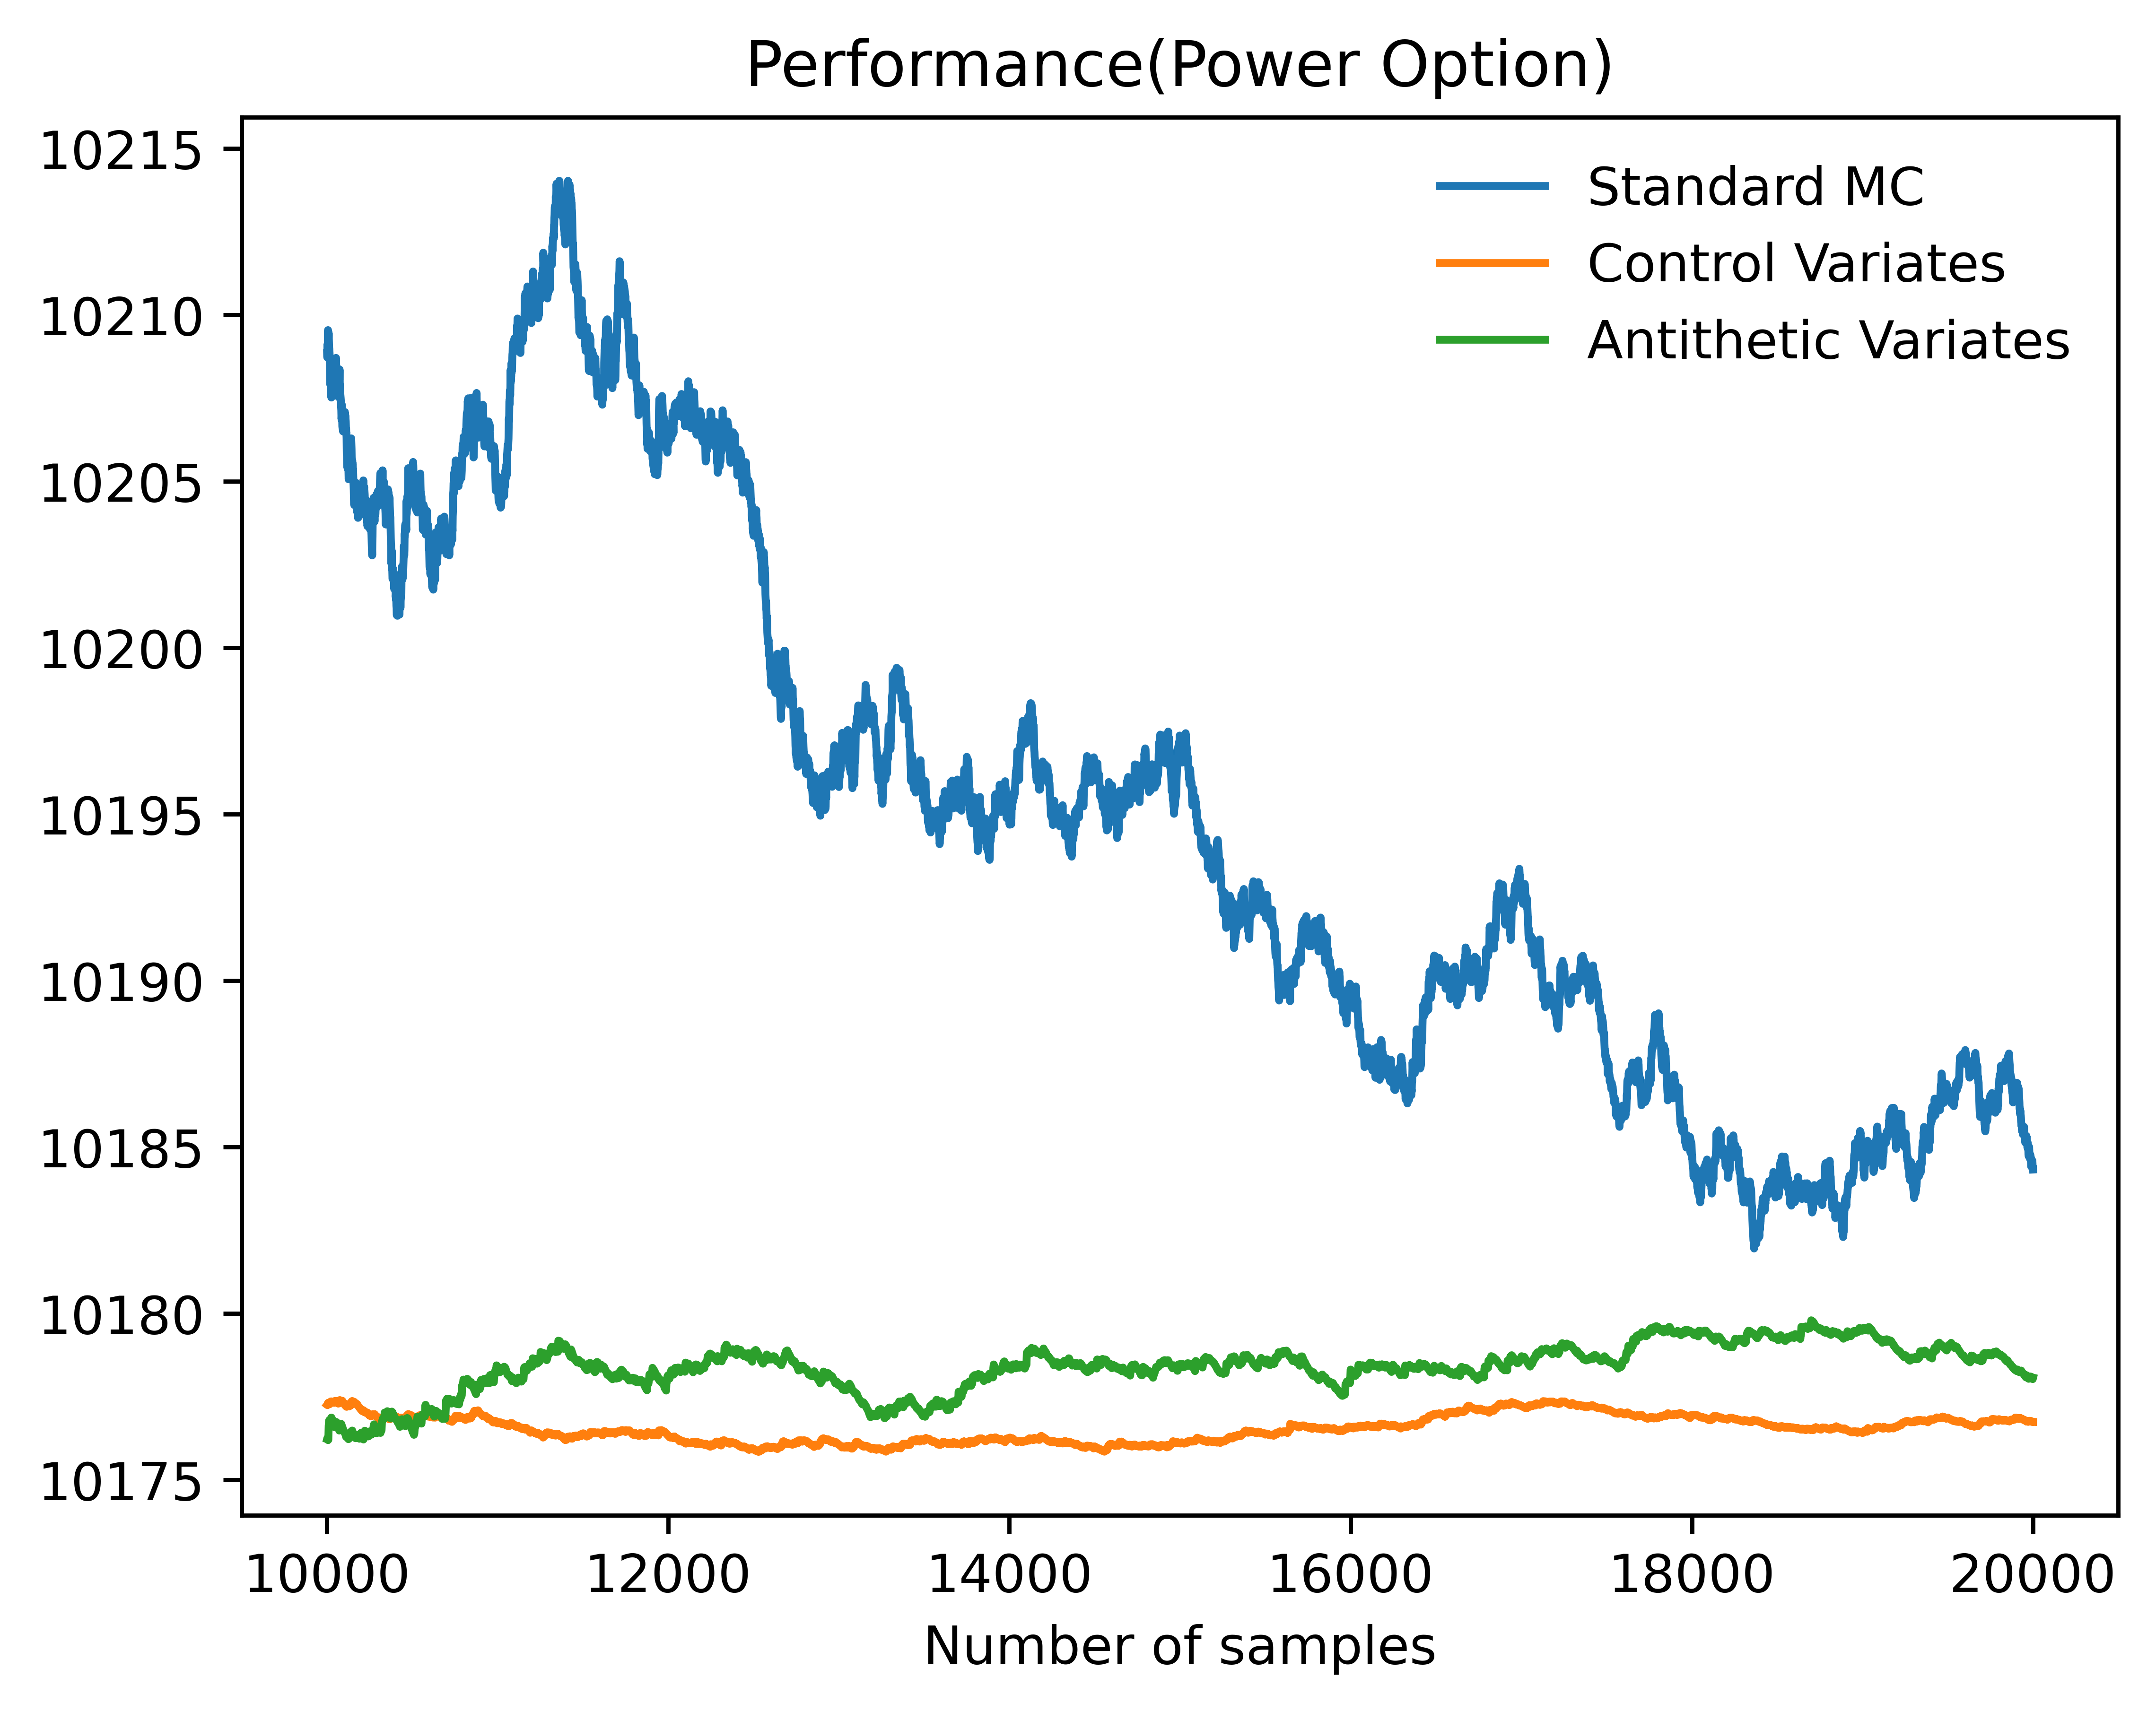

In [7]:
sample_size=20000
S0=100   #assume

antithetic=[]
z_control=np.random.default_rng(seed=123456).standard_normal(size=sample_size) #正态分布随机数 size=20000
S_T=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z_control)
Y_control=S_T
X=np.exp(-r*T)*Y_control**2
b_star= np.cov(X, Y_control)[0, 1] / Y_control.var()
control_variates_est = X - b_star * (Y_control - S0*np.exp(r*T))
performance_control_variates=1 - control_variates_est.var() / X.var()
print('performance of control variates:',performance_control_variates)

z_antithetic=np.random.default_rng(seed=123456).standard_normal(size=sample_size//2)
S_T1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z_antithetic)
S_T2=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*(-z_antithetic))
X1=np.exp(-r*T)*S_T1**2
X2=np.exp(-r*T)*S_T2**2
Y=(X1+X2)/2
performance_antithetic_variates=1-Y.var()/X.var()
print('performance of antithetic variates:',performance_antithetic_variates)

for i in Y:
    antithetic.append(i)
    antithetic.append(i)
burn_in_samples = sample_size // 2
fig, ax = plt.subplots()
xx = np.arange(burn_in_samples+1, sample_size+1)


running_average = np.cumsum(X)[burn_in_samples:] / xx
running_average_covariates = np.cumsum(control_variates_est)[burn_in_samples:] / xx
running_average_antithetic = np.cumsum(antithetic)[burn_in_samples:] / xx
plt.rcParams['figure.dpi'] = 800
ax.plot(xx, running_average, label='Standard MC')
ax.plot(xx, running_average_covariates, label='Control Variates')
ax.plot(xx,running_average_antithetic,label='Antithetic Variates')
ax.set_xlabel('Number of samples')
ax.set_title('Performance(Power Option)')
ax.legend(frameon=False);

## Log Option

performance of control variates: 0.9949171347598493
performance of antithetic variates: 1.0


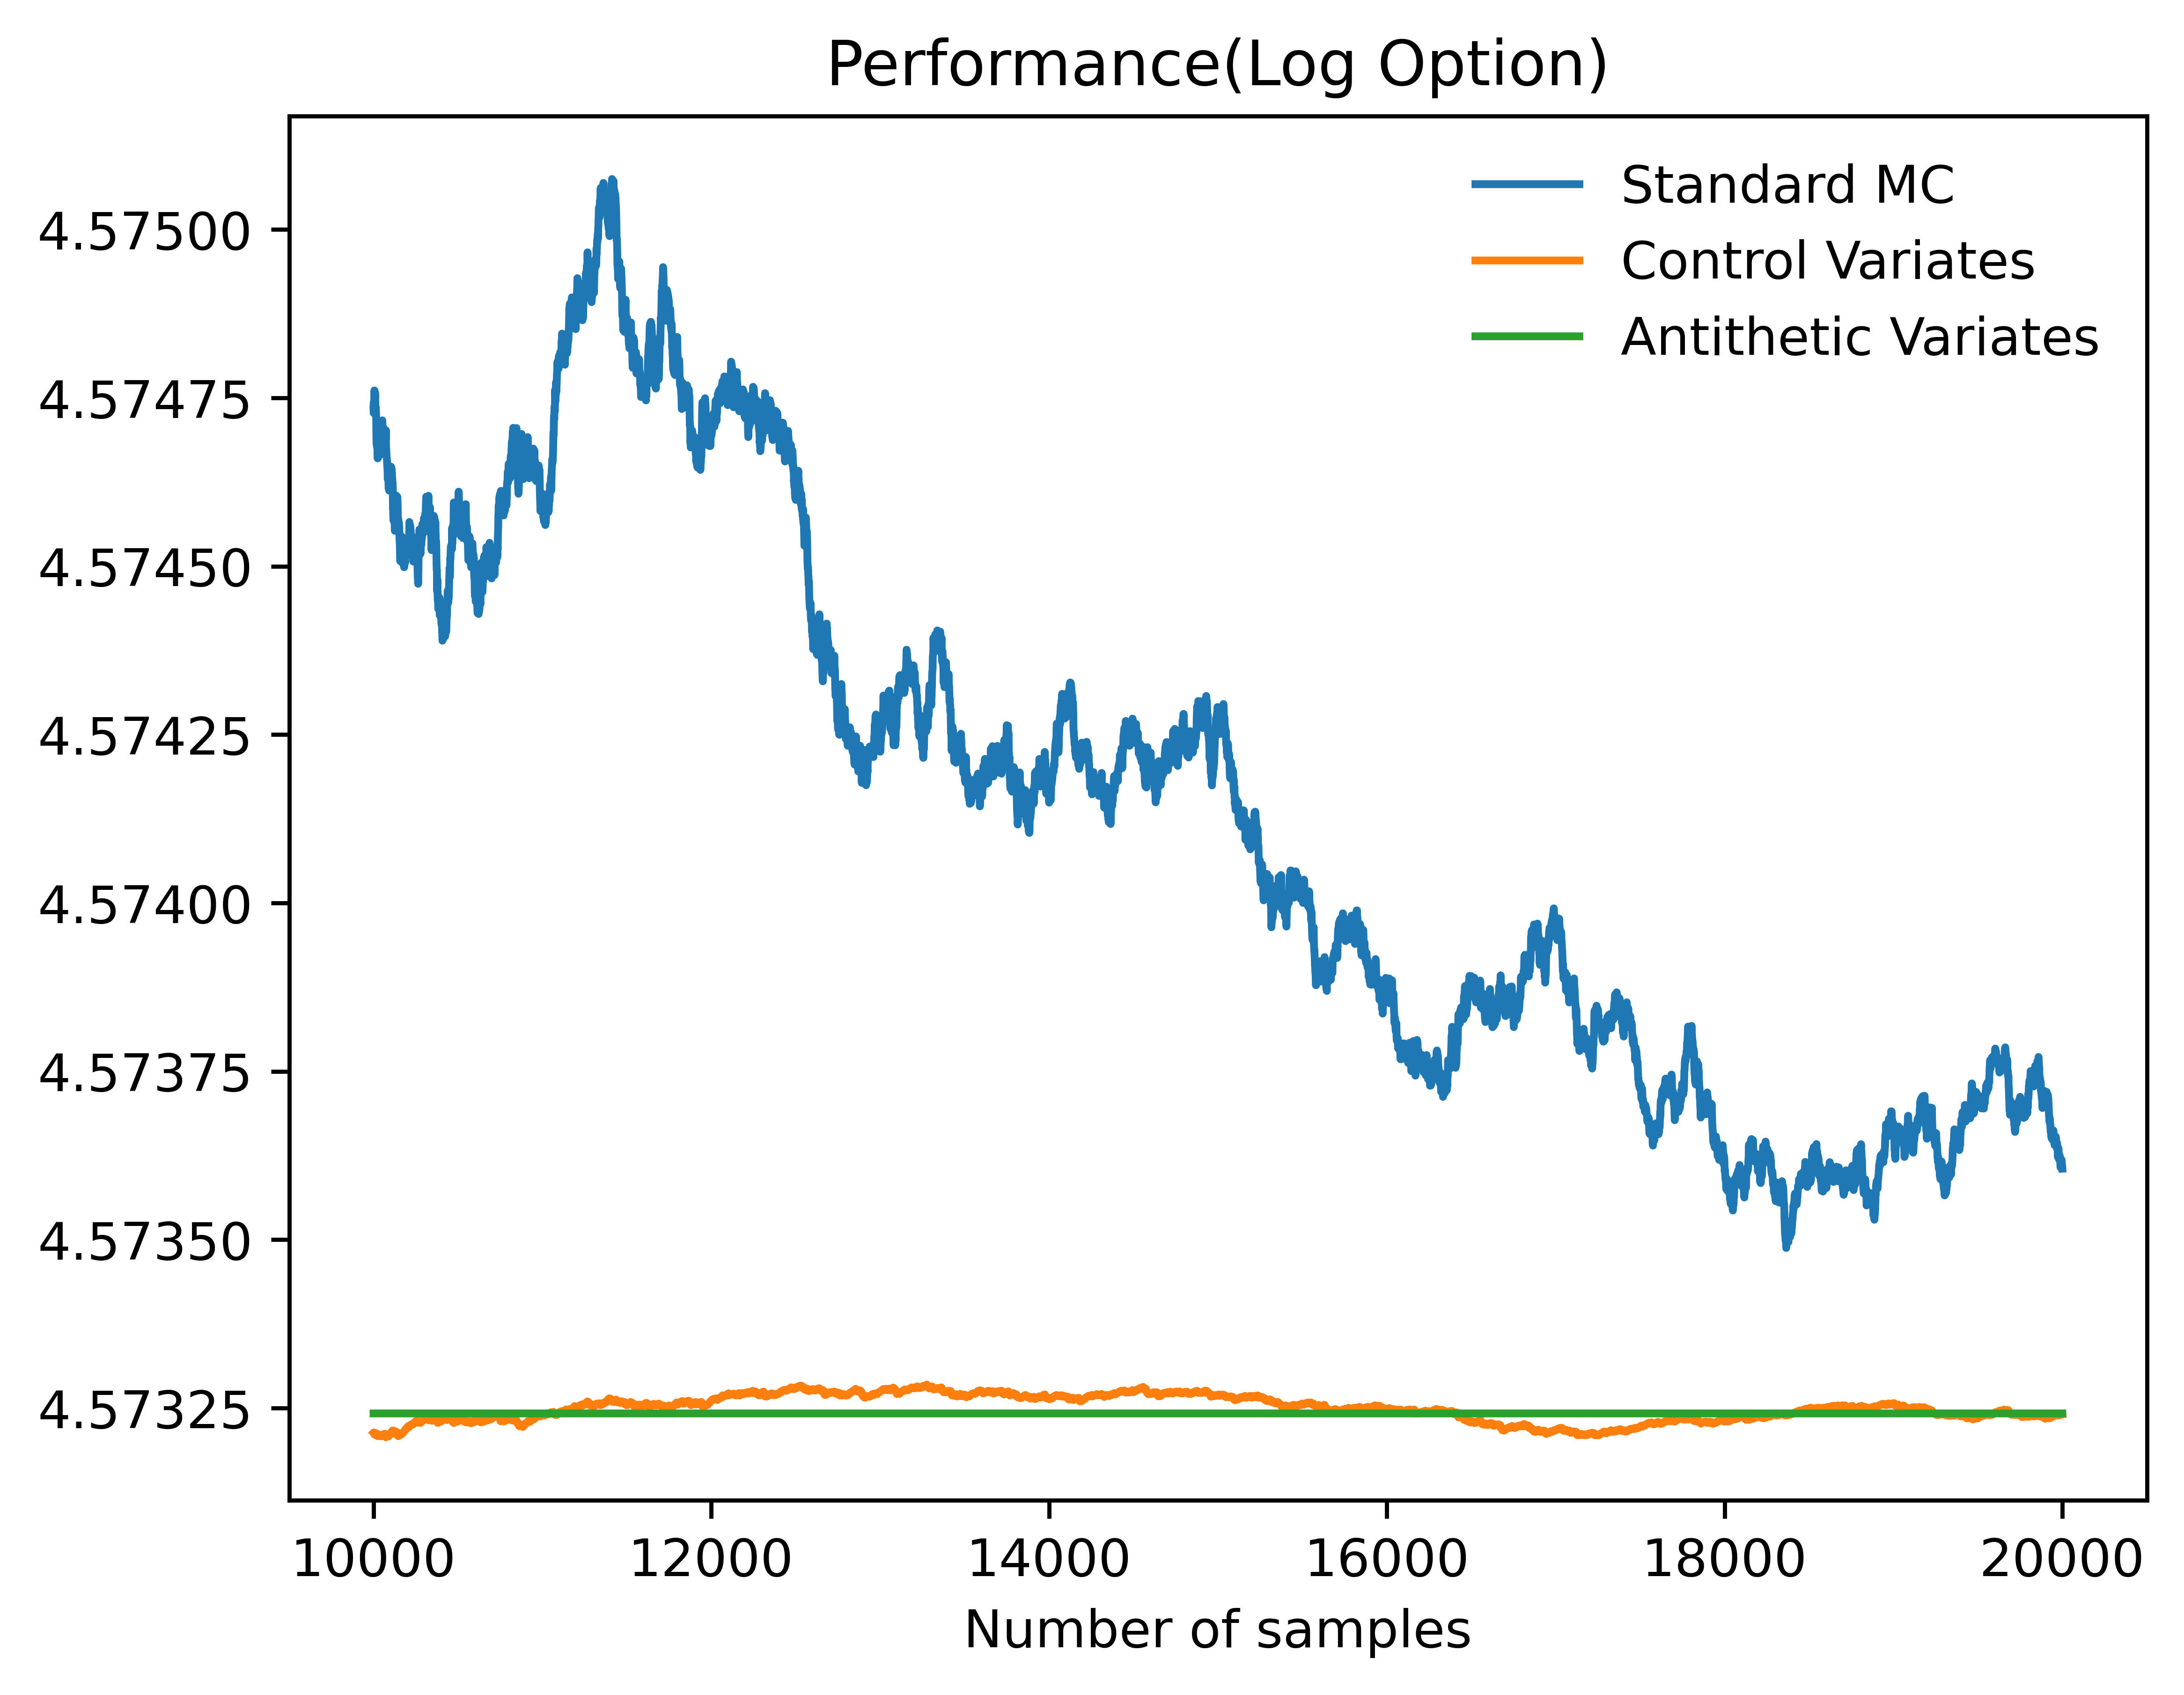

In [8]:
sample_size=20000
S0=100   #assume

antithetic=[]
z_control=np.random.default_rng(seed=123456).standard_normal(size=sample_size) #正态分布随机数 size=20000
S_T=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z_control)
Y_control=S_T
X=np.exp(-r*T)*np.log(Y_control)
b_star= np.cov(X, Y_control)[0, 1] / Y_control.var()
control_variates_est = X - b_star * (Y_control - S0*np.exp(r*T))
performance_control_variates=1 - control_variates_est.var() / X.var()
print('performance of control variates:',performance_control_variates)

z_antithetic=np.random.default_rng(seed=123456).standard_normal(size=sample_size//2)
S_T1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*z_antithetic)
S_T2=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*(-z_antithetic))
X1=np.exp(-r*T)*np.log(S_T1)
X2=np.exp(-r*T)*np.log(S_T2)
Y=(X1+X2)/2
performance_antithetic_variates=1-Y.var()/X.var()
print('performance of antithetic variates:',performance_antithetic_variates)

for i in Y:
    antithetic.append(i)
    antithetic.append(i)
burn_in_samples = sample_size // 2
fig, ax = plt.subplots()
xx = np.arange(burn_in_samples+1, sample_size+1)


running_average = np.cumsum(X)[burn_in_samples:] / xx
running_average_covariates = np.cumsum(control_variates_est)[burn_in_samples:] / xx
running_average_antithetic = np.cumsum(antithetic)[burn_in_samples:] / xx
plt.rcParams['figure.dpi'] = 800
ax.plot(xx, running_average, label='Standard MC')
ax.plot(xx, running_average_covariates, label='Control Variates')
ax.plot(xx,running_average_antithetic,label='Antithetic Variates')
ax.set_xlabel('Number of samples')
ax.set_title('Performance(Log Option)')
ax.legend(frameon=False);